In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
# Aim is to predict the marks of students of the test data

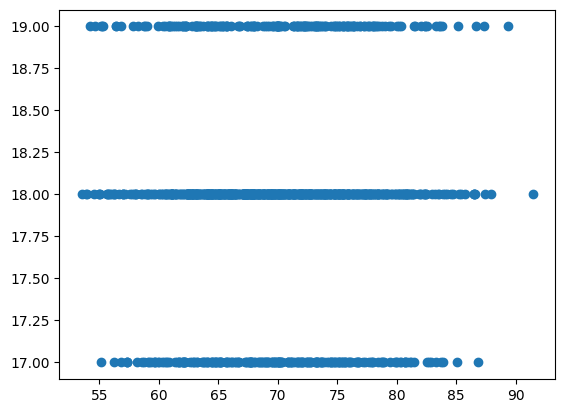

In [142]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('https://github.com/wncc/Machine-Learning-LS-24/raw/main/Week%201/Assignment/%20Linear%20Regression%20Assignment/Training%20data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
plt.scatter(y_train,data.iloc[:,6])
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM
x_train[x_train=='yes']=1
x_train[x_train=='no']=0
x_train[x_train=='M']=1
x_train[x_train=='F']=0
x_train=x_train.astype(np.float64)
def feature_changing(x_train):
    # Your code here
    binary_feature=[0,1]
    continous_feature=[2,3,4,5,6,7]
    preprocessor=ColumnTransformer(
        transformers=[
            ('num',StandardScaler(),continous_feature),
            ('binary','passthrough',[0,1]),
        ]
    )
    preprocessor.fit(x_train)
    x_train=preprocessor.transform(x_train)

    binary_data = x_train[:, binary_feature]
    continuous_data = x_train[:, :len(continous_feature)]
    x_train = np.column_stack((binary_data, continuous_data))

    scaler=preprocessor.named_transformers_['num']
    x_mean=scaler.mean_
    x_m=x_train[0].mean()
    x_m2=x_train[1].mean()
    x_mean=np.insert(x_mean,0,[x_m,x_m2])

    x_std=scaler.scale_
    x_s=x_train[0].std()
    x_s2=x_train[1].std()
    x_std=np.insert(x_std,0,[x_s,x_s2])


    return x_train

x_train = feature_changing(x_train)

In [148]:
def z_score(x_train):
    # write the code for feature scaling here
    # Your code here
    binary_feature=[0,1]
    continous_feature=[2,3,4,5,6,7]
    preprocessor=ColumnTransformer(
        transformers=[
            ('num',StandardScaler(),continous_feature),
            ('binary','passthrough',[0,1])
        ]
    )
    preprocessor.fit(x_train)
    x_train=preprocessor.transform(x_train)
    # scaler=preprocessor.named_transformers_['num']
    # x_mean=scaler.mean_
    # x_std=x_train.scale_

    # binary_data = x_train[:,binary_feature]
    # continuous_data = x_train[:, :len(continous_feature)]
    # x_train = np.column_stack((binary_data, continuous_data))

    scaler=preprocessor.named_transformers_['num']
    x_mean=scaler.mean_
    x_m=x_train[0].mean()
    x_m2=x_train[1].mean()
    x_mean=np.insert(x_mean,0,[x_m,x_m2])

    x_std=scaler.scale_
    x_s=x_train[0].std()
    x_s2=x_train[1].std()
    x_std=np.insert(x_std,0,[x_s,x_s2])


    return x_train,x_std,x_mean


In [162]:
def cost(x_train,y_train,w,b):
    # Your code here
    # Use mean square error as cost function
    # return cost
    total_loss=0
    n=len(y_train)
    for i in range(len(y_train)):
      total_loss+=(y_train-(np.dot(x_train,w)+b))**2
    loss=(1/(2*n))*np.sum((y_train-(np.dot(x_train,w)+b))**2)
    return loss

In [168]:
def gradient_descent(x_train,y_train,w,b):
    # Your code here
    # Choose learning rate yourself
    w_gradient=0
    b_gradient=0
    n=len(y_train)

    L=0.000001
    for i in range(n):
      w_gradient+=-(2/n)*np.dot(x_train.T, (y_train-(np.dot(x_train,w)+b)))
      # b_gradient+=-(2/n)*(y_train-(np.dot(x_train,w)+b))

    b_gradient=(1/n)*np.sum((y_train-(np.dot(x_train,w)+b)))
    w=w-w_gradient*L
    b=b-b_gradient*L

    return w,b

In [169]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
   old_cost = cost(x_train,y_train,w,b)
   w,b = gradient_descent(x_train,y_train,w,b)
   new_cost=cost(x_train,y_train,w,b)
   print(abs(old_cost - cost(x_train,y_train,w,b)))

x_predict = pd.read_excel('https://github.com/wncc/Machine-Learning-LS-24/raw/main/Week%201/Assignment/%20Linear%20Regression%20Assignment/Test%20data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('https://github.com/wncc/Machine-Learning-LS-24/raw/main/Week%201/Assignment/%20Linear%20Regression%20Assignment/Test%20data.xlsx').iloc[:,8].to_numpy()

y_predict = (np.dot(x_predict,w) + b)

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

0.13863345734853283
0.13783627118937147
0.13704409692445552
0.1362568996214577
0.13547464460225456
0.13469729745565928
0.13392482401877714
0.13315719039383112
0.13239436292496976
0.13163630821782135
0.13088299312084928
0.13013438473353744
0.1293904503986596
0.1286511577022793
0.12791647447329524
0.1271863687811674
0.12646080893091494
0.1257397634640256
0.12502320115845578
0.12431109102044502
0.12360340229224676
0.12290010443894062
0.12220116715707263
0.12150656036556029
0.12081625420978526
0.12013021905340793
0.1194484254820054
0.11877084429943352
0.11809744652691734
0.11742820339804894
0.11676308636151589
0.11610206707791804
0.11544511741749375
0.11479220945693669
0.11414331548348855
0.11349840798538935
0.1128574596573344
0.11222044339456261
0.11158733229376594
0.11095809964763248
0.11033271895121288
0.10971116389100644
0.1090934083472348
0.10847942639884423
0.1078691923084989
0.1072626805339496
0.10665986571893882
0.10606072269365541
0.10546522647518941
0.10487335226571304
0.10428507